# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in <u>seconds</u> ( Output Variable )

#### <u>There is approx **1.5 million** records in our data set<u>

# **Introduction :**
##### In this era of hussle and bustle, everyone wants to save some time from their daily life. And for the people who wants to save some time for their relaxation or important meeting or a football match, road journeys are the main obstacles. In New York City, on an average, people spend around 54 minutes in public transports daily, and 55% among them spend above 2 hours. Average waiting time for public transports is around 13 minutes in New York City.
##### And here comes a scenario where this average time for arrival to destination is very important. Say, somebody has a very important meeting from 11 AM and he lives around 2 KMs away from his office. Now, he has to know how he should plan his journey (whether take a walk or taxi) and when he should get out from his home etc. That's why getting an estimate of EDA time is important is many situations.
##### Nowadays people can get that information from Google Maps or some online taxi service provider they are using.
##### Here, I want to model that EDA time using some supervised ML models and try to get an idea of how Google, OLA, Uber etc provide those EDA times.

# **Approach :**
##### To solve the problem, I have devised a 4-step approach below:

#### **1. Basic EDA :**
##### In this step, I want to do some exploration on the data. First, I shall check for null values and try to replace or remove them. Then, I shall check for outliers using boxplots and try to replace or remove them. Thirdly, I shall get some visualizations to get an idea of the variables in hand.

#### **2. Feature Engineering :**
##### In this second step, I want to come up with some new features using the existing ones which might be better in explaining my dependent variable 'trip_duration'. And I shall plot a correlation heatmap to evaluate the relationship between variables. Also, I shall do some EDA on newly made variables and do some anomaly detection to make the model more robust.

#### **3. Model training and testing :**
##### In this step, I shall get a train-test pair from the given dataset and fit 4 regression models to the train set, make predictions on the test set using them and calculate various evaluation metrics. The models are namely : Linear Regression, Random Forests, Gradient Boosting Machine, Support Vector Machines.

#### **4. Model Evaluation :**
##### As the last step, I shall compare all the models and try to come up with a conclusion about which model might be the best choice here.

# **Analysis:**

### **Data Exporting and exploration :**

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

In [64]:
# Reading the dataset
taxi_df = pd.read_csv('D:/Project/NYC Taxi/NYC Taxi Data.csv')

In [33]:
# Having a glance at the dataset
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [25]:
# Getting the shape of the dataset
taxi_df.shape

(1458644, 11)

In [26]:
# Check count of unique id's in the dataset
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(taxi_df.id.nunique()))


There are 1458644 unique id's in Training dataset, which is equal to the number of records


In [65]:
taxi_df=taxi_df.set_index("id")

In [35]:
taxi_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [36]:
# Getting an info of the dataset
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


## **1. Basic EDA :**

#### From the above info table and shape, it is clear that there are no null values present in the dataset. There goes a huge burden from my shoulders! Now, let's analyze further.

In [38]:
# Getting a description of all the variables
taxi_df.describe(include = 'all')

C:\Users\Shubhankar Debnath\AppData\Local\Temp\ipykernel_2216\3208589384.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  taxi_df.describe(include = 'all')
C:\Users\Shubhankar Debnath\AppData\Local\Temp\ipykernel_2216\3208589384.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  taxi_df.describe(include = 'all')


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
first,NaN,2016-01-01 00:00:17,2016-01-01 00:03:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-30 23:59:39,2016-07-01 23:02:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02


Text(0.5, 1.0, 'Boxplots of numerical variables')

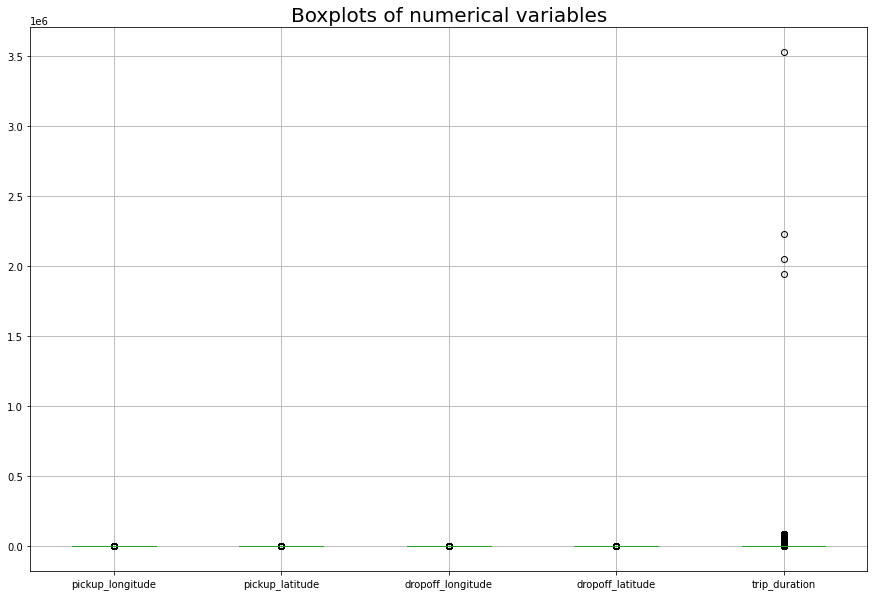

In [39]:
# Plot a boxplot to get an idea of absurd values
plt.figure(figsize=(15,10))
taxi_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']].boxplot()
plt.title('Boxplots of numerical variables', fontsize = 20)

#### We can see that there are no visible and distant outliers in the dataset except for trip_duration which is our dependent variable. Let's have a look at those 4 data points. 

In [66]:
# Sorting the dataset according to trip_duration
taxi_df.sort_values(by = ['trip_duration'], axis = 0, ascending = False)[:4]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282
id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736


#### We can see that those 4 values are in millions! Maybe they are of some out of the town and long journeys which are not part of normal routings. I have no hesitation to remove them!

In [67]:
# Deleting the rows with top 4 trip duration
taxi_df = taxi_df.sort_values(by = ['trip_duration'], axis = 0, ascending = False)[4:]

#### Now, let's check if there are some very low trip durations.

In [47]:
# Getting rows with trip duration less than 1 minute
taxi_df[taxi_df['trip_duration'] <= 60]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id1094398,2,2016-01-06 21:03:52,2016-01-06 21:04:52,1,-73.965988,40.762531,-73.962082,40.767712,N,60
id3745181,1,2016-01-18 23:01:11,2016-01-18 23:02:11,1,-73.947685,40.778572,-73.950653,40.779911,N,60
id2303511,1,2016-01-22 01:16:28,2016-01-22 01:17:28,1,-73.964157,40.807880,-73.966515,40.804478,N,60
id0941804,2,2016-03-15 18:51:19,2016-03-15 18:52:19,1,-74.001160,40.751999,-73.997276,40.755501,N,60
id2064163,1,2016-02-14 13:05:59,2016-02-14 13:06:59,1,-73.948608,40.782478,-73.953705,40.784546,N,60
...,...,...,...,...,...,...,...,...,...,...
id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1
id0008221,2,2016-05-16 14:42:18,2016-05-16 14:42:19,1,-73.787086,40.647388,-73.789780,40.646992,N,1
id3563137,2,2016-04-15 17:32:22,2016-04-15 17:32:23,1,-73.782417,40.644154,-73.782433,40.644169,N,1


##### Okay, now this one looks like some erronous inputs have been given. We can see that the person has travelled with respect to long-lat but his/her trip time was somehow inputted as 1 erronously. Even there are some durations less than 60 seconds. I mean no one can just get into a taxi and get out of it in a minute, right? 

I shall not remove them now will look more deep into it on furthur analysis

In [71]:
taxi_df.trip_duration.describe()

count    1.458640e+06
mean     9.528153e+02
std      3.171322e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      8.639200e+04
Name: trip_duration, dtype: float64

d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


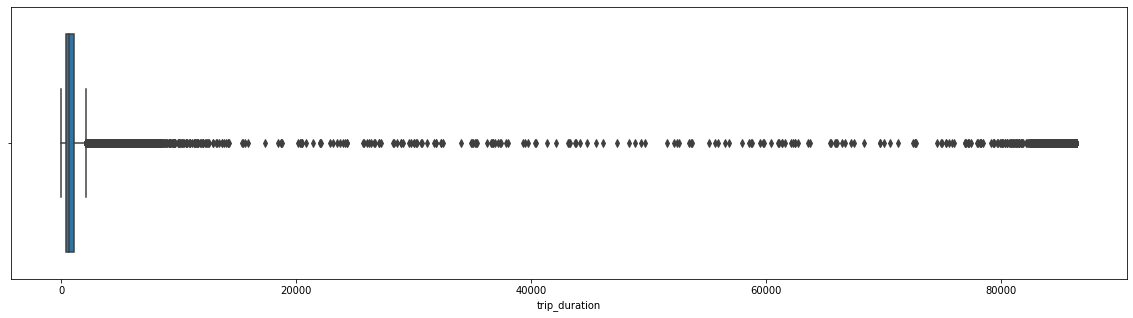

In [73]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.trip_duration)
plt.show()

Major trip durations took between 10-20 mins to complete.
Mean and mode are not same which shows that trip duration distribution is skewed towards right.

There are some trips with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.
Major chunk of trips are completed within an interval of 1 hour with some good numbers of trips duration going above 1 hour.
Let's look at those trips with huge duration, these are outliers and should be removed for the data consistency.

We should get rid of them for the sake of data consistency.

In [74]:
taxi_df = taxi_df[taxi_df.trip_duration <= 86400]


Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively

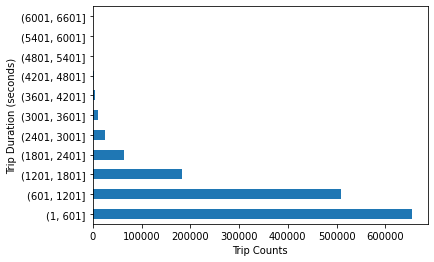

In [78]:
taxi_df.trip_duration.groupby(pd.cut(taxi_df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs. Let's move ahead to next feature.




<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

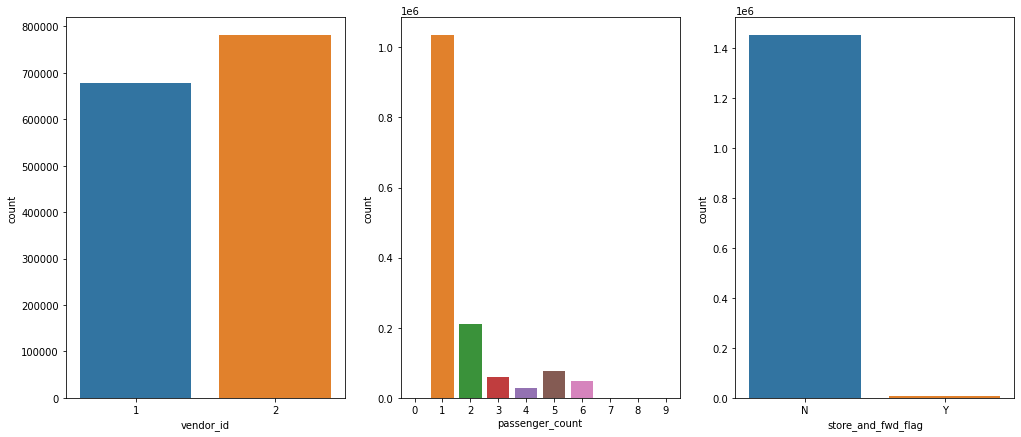

In [80]:
# Plotting barplots for categorical columns
plt.figure(figsize=(17,7))

plt.subplot(1,3,1)
sns.countplot(data = taxi_df, x = 'vendor_id')

plt.subplot(1,3,2)
sns.countplot(data = taxi_df, x = 'passenger_count')

plt.subplot(1,3,3)
sns.countplot(data = taxi_df, x = 'store_and_fwd_flag')


There are a few conclusions to make here:
*   Vendor id 2 gets most trips
*   Passengers are more likely to travel solo.
*   Most of trip consist of passenger either 1 or 2.
*   Taxis with more than 6 passengers are rare.
*   There are some entries which have 0 passengers.
*   Most of the trips were not held in vehicle memory.





We can delete taxis with 7,8,9 passengers as they are minuscule in frequency. I shall remove them. 


New York City Taxi Passenger Limit says:

* A maximum of 4 passengers can ride in traditional cabs, there are also 5 passenger cabs that look more like minivans.
* A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.

So, in total we can assume that maximum 6 passenger can board the new york taxi i.e. 5 adult + 1 minor

In [81]:
# Getting rows with less than or equal to 6 passenger count
taxi_df = taxi_df[taxi_df['passenger_count'] <= 6]

Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis

In [82]:
taxi_df.passenger_count.describe()

count    1.458635e+06
mean     1.664510e+00
std      1.314199e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

As per above details. Mean median and mode are all approx equal to 1. So we would replace the 0 passenger count with 1.

In [83]:
taxi_df['passenger_count'] = taxi_df.passenger_count.map(lambda x: 1 if x == 0 else x)

In [84]:
taxi_df.passenger_count.value_counts()

1    1033597
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

#### Now the data is consistent with respect to the passenger count. Let's take a look at the ditribution with a graph below

d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


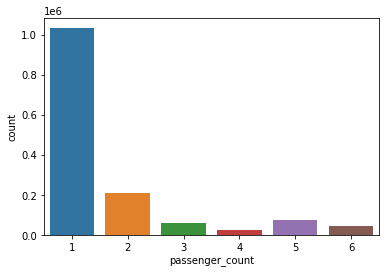

In [85]:
sns.countplot(taxi_df.passenger_count)
plt.show()

And with that, our basic EDA is completed. Now, let's do some feature engineering and come up with some interesting features.

# **2. Feature Engineering :**

### **1. Creating variables for pickup and dropoff times :**

In [88]:
# Changing data type of datetimes
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])

In [89]:
# Extracting hours from pickup and dropoff datetime
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour

In [90]:
# Extracting days from pickup and dropoff datetime
taxi_df['pickup_day'] = taxi_df['pickup_datetime'].dt.day_name()
taxi_df['dropoff_day'] = taxi_df['dropoff_datetime'].dt.day_name()

In [91]:
# Extracting months from pickup and dropoff datetime
taxi_df['pickup_month'] = taxi_df['pickup_datetime'].dt.month
taxi_df['dropoff_month'] = taxi_df['dropoff_datetime'].dt.month

In [92]:
taxi_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_month,dropoff_month
id,,,,,,,,,,,,,,,,
id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,23,23,Monday,Tuesday,2,2
id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,13,13,Tuesday,Wednesday,5,6
id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390,0,0,Friday,Saturday,5,5
id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,16,16,Thursday,Friday,6,7
id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385,16,16,Thursday,Friday,6,6


<AxesSubplot:xlabel='dropoff_hour'>

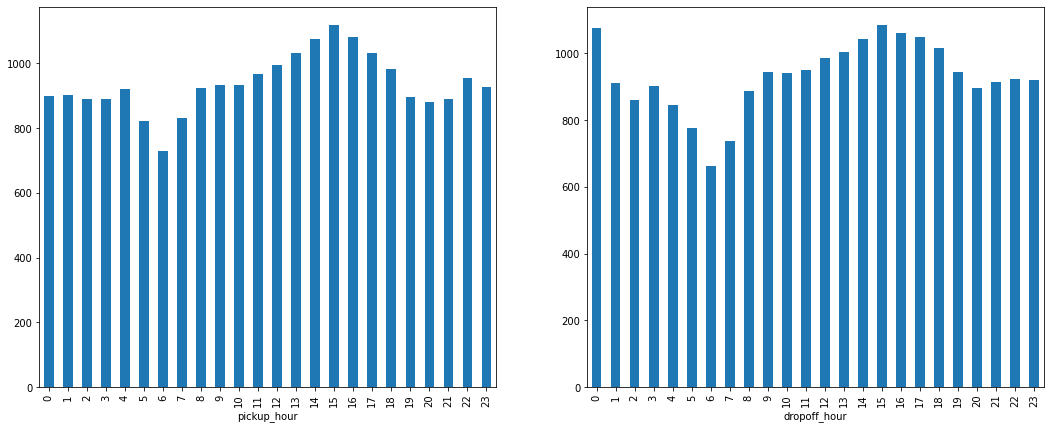

In [93]:
# Now let's see how the average trip duration changes during the day
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
taxi_df.groupby('pickup_hour')['trip_duration'].mean().plot(kind = 'bar')
plt.subplot(1,2,2)
taxi_df.groupby('dropoff_hour')['trip_duration'].mean().plot(kind = 'bar')

#### We can see that average trip duration is higher during 10AM-7PM. That's the rush hour in any city and it is obvious.


In [94]:
# Dropping the pickup and dropoff datetime columns
taxi_df.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)

#### Now, let's have a look at the correlation heatmap

<AxesSubplot:>

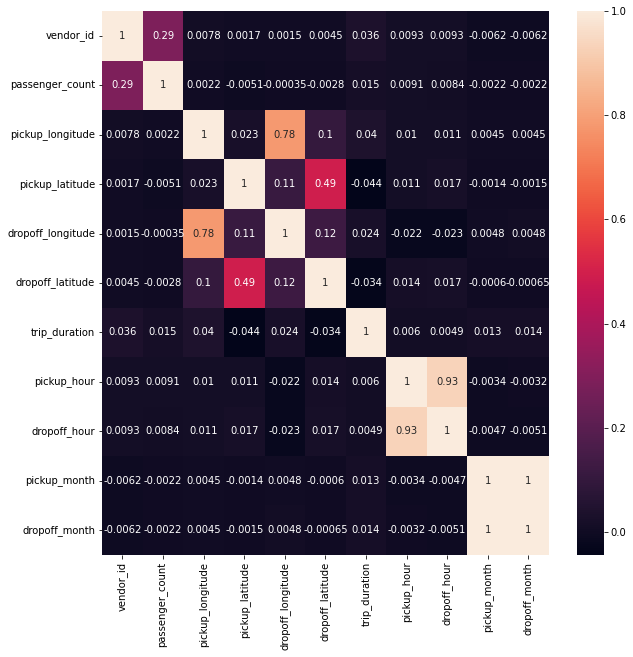

In [95]:
# Plotting correlation heatmap
corrmat = taxi_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrmat, annot = True)

It is evident from the above heatmap that pickup and dropoff longitude & pickup and dropoff latitude are highly correlated. Here, we can combine them by calculating the distance between those points and introduce a new variable.

### **2. Distance between pickup and dropoff locations :**

In [96]:
# Introducing a new column to store geo distance between pickup and dropoff locations (in kms)
def f(row):
    try:
        return geopy.distance.geodesic((row['pickup_latitude'], row['pickup_longitude']), 
                                       (row['dropoff_latitude'], row['dropoff_longitude'])).km
    except:
         return 0

taxi_df['distance'] = taxi_df.apply(f, axis=1)

In [97]:
# Dropping the longitude latitude columns
taxi_df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1, inplace = True)

In [98]:
# Now, let's have a look at our modified dataset
taxi_df.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
id,,,,,,,,,,,
id1942836,2,2,N,86392,23,23,Monday,Tuesday,2,2,20.666941
id0593332,2,1,N,86391,13,13,Tuesday,Wednesday,5,6,21.147722
id0953667,2,1,N,86390,0,0,Friday,Saturday,5,5,2.005244
id2837671,2,1,N,86387,16,16,Thursday,Friday,6,7,6.199703
id1358458,2,1,N,86385,16,16,Thursday,Friday,6,6,17.335134


<AxesSubplot:>

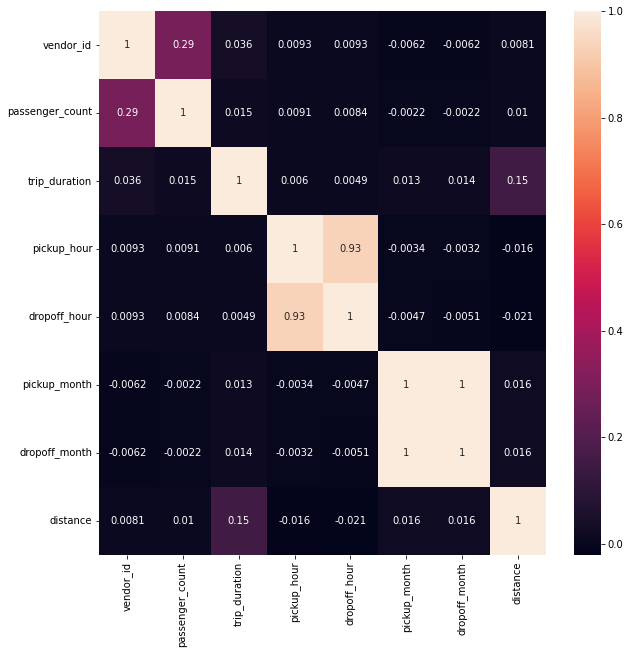

In [100]:
# Plotting correlation heatmap
corrmat_1 = taxi_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrmat_1, annot = True)

#### Let's now have a look on the distribution of the distance across the different types of rides.



In [101]:
taxi_df.distance.describe()

count    1.458635e+06
mean     3.442177e+00
std      4.300223e+00
min      0.000000e+00
25%      1.232266e+00
50%      2.094045e+00
75%      3.874712e+00
max      1.240510e+03
Name: distance, dtype: float64

d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


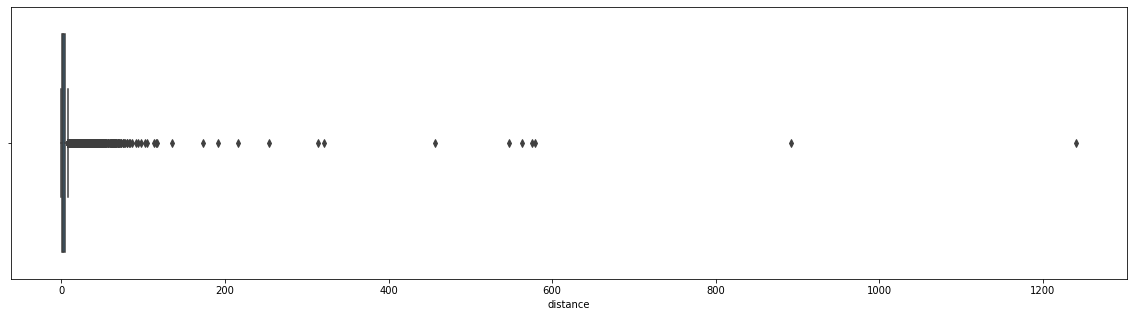

In [103]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.distance)
plt.show()

Interesting find:¶
* There some trips with over 100 km distance.
* Some of the trips distance value is 0 km.

Observations:
* Mean distance travelled is approx 3.5 kms.
* Standard deviation of 4.3 which shows that most of the trips are limited to the range of 1-10 kms.

In [104]:
print("There are {} trip records with 0 km distance".format(taxi_df.distance[taxi_df.distance == 0 ].count()))

There are 5895 trip records with 0 km distance


In [107]:
taxi_df[taxi_df.distance==0].head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
id,,,,,,,,,,,
id2177467,2,1,N,86352,1,1,Sunday,Monday,6,6,0.0
id3070191,2,3,N,85333,15,15,Friday,Saturday,1,1,0.0
id2761053,2,1,N,78288,13,11,Wednesday,Thursday,5,5,0.0
id2237791,2,1,N,5929,16,18,Wednesday,Wednesday,6,6,0.0
id1340787,2,2,N,4683,17,18,Wednesday,Wednesday,5,5,0.0


Observations :
Around 6K trip record with distance equal to 0. Below are some possible explanation for such records.
* Customer changed mind and cancelled the journey just after accepting it.
* Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
* Issue with GPS tracker while the journey is being finished.
* Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start
* Or some other issue with the software itself which a technical guy can explain

There is some serious inconsistencies in the data where drop off location is same as the pickup location. We can't think off imputing the distance values considering a correlation with the duration because the dropoff_location coordinates would not be inline with the distance otherwise. 

**There are some durations with as low as 1 second. which points towards trips with 0 km distance.**


### **3. Introducing Speed :**

Let's introduce another feature for trip duration, represented in hours and average speed of the vehicle. The formal column will not be used in ML algorithms, but it will help us in detecting some anomalies.

In [108]:
# Introducing trip duration in hours
taxi_df['trip_duration_hour'] = taxi_df['trip_duration']/3600

Text(0, 0.5, 'Trip Duration in hours')

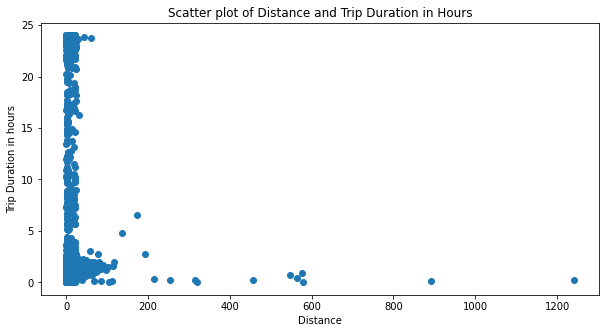

In [109]:
# Plotting distance vs trip duration in hours scatter plot
plt.figure(figsize = (10,5))
plt.scatter(data = taxi_df, x = 'distance', y = 'trip_duration_hour')
plt.title('Scatter plot of Distance and Trip Duration in Hours')
plt.xlabel('Distance')
plt.ylabel('Trip Duration in hours')

We can see that there are some outliers here, and also there are some 0 distances. 

So here I am going to replace the 0 distances with mean distances.

In [110]:
# Replacing 0 distances with mean distances
mean_dist=taxi_df['distance'].mean()
taxi_df.loc[taxi_df['distance']==0,'distance']=mean_dist

In [111]:
# Introducing speed
taxi_df['speed'] = taxi_df['distance']/taxi_df['trip_duration_hour']

d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of speed')

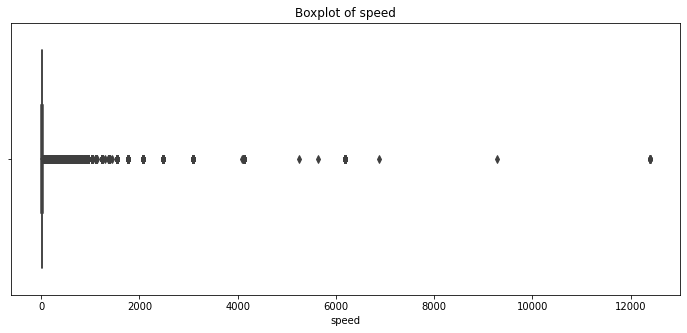

In [112]:
plt.figure(figsize = (12,5))
sns.boxplot(taxi_df['speed'])
plt.title('Boxplot of speed')

We can see that there are some speed which are even in thousands. We are not driving planes on roads, right? So, I'm taking an upper limit of 100 Kmph and lower limit of 1 Kmph for speed.

In [113]:
# Dropping rows with speed more than 100 or less than 1
taxi_df = taxi_df[(taxi_df['speed']<100) & (taxi_df['speed']>1)]

d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

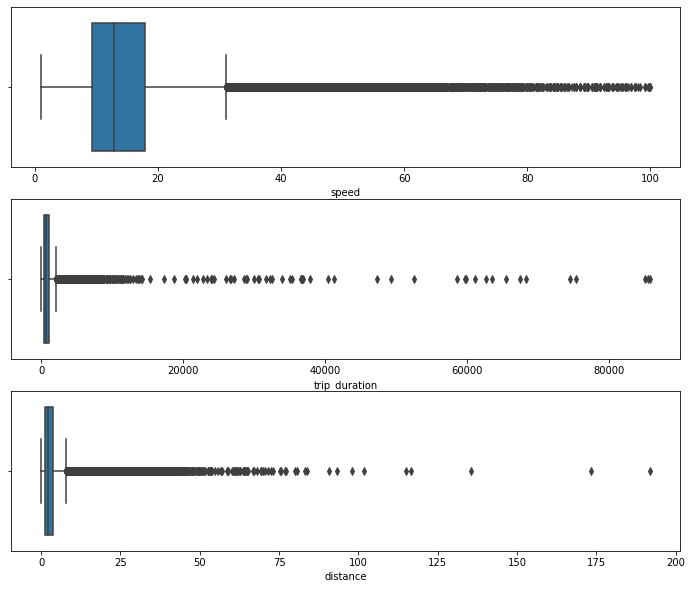

In [114]:
# Boxplots of speed, trip duration and distance
plt.figure(figsize = (12,10))

plt.subplot(3,1,1)
sns.boxplot(taxi_df['speed'])

plt.subplot(3,1,2)
sns.boxplot(taxi_df['trip_duration'])

plt.subplot(3,1,3)
sns.boxplot(taxi_df['distance'])

Although the boxplot of speed shows that there are many outliers, I don't think I should remove them as they are highly congested and might hold some useful information. And cabs can drive upto 100kms/hr, right?

##### But I shall remove some of the trip durations and distances as some of the values are way too higher than the normal range.

In [128]:
# Removing rows with more than 10000 seconds trip duration
taxi_df = taxi_df[taxi_df['trip_duration']<10000]

In [129]:
# Removing rows with more than 60 kms distance
taxi_df = taxi_df[taxi_df['distance']<=60]

In [130]:
# Let's have a look a the dataset again
taxi_df.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_month,dropoff_month,distance,trip_duration_hour,speed
id,,,,,,,,,,,,,
id2775008,1,1,Y,9984,13,16,Monday,Monday,5,5,18.872769,2.773333,6.805085
id1357675,1,4,N,9922,17,20,Friday,Friday,4,4,23.846783,2.756111,8.652330
id0951735,1,1,N,9714,15,17,Sunday,Sunday,5,5,19.103174,2.698333,7.079620
id1628821,1,1,N,9676,17,19,Sunday,Sunday,5,5,21.414361,2.687778,7.967311
id1053863,2,1,N,9581,21,0,Wednesday,Thursday,6,6,3.672579,2.661389,1.379948


Now, it seems that most of our abnormal values are gone. Further addition, I shall first do one-hot encoding of categorical columns . It will help me in modeling .

In [118]:
# Changing data types of categorical features
taxi_df['vendor_id'] = taxi_df['vendor_id'].astype(object)
taxi_df['passenger_count'] = taxi_df['passenger_count'].astype(object)

In [119]:
# Getting dummies
taxi_df_model = pd.get_dummies(taxi_df)

d:\Python\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [120]:
# Now, let's see how the data looks like
taxi_df_model.head()

,trip_duration,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,trip_duration_hour,speed,vendor_id_1,vendor_id_2,...,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday
id,,,,,,,,,,,,,,,,,,,,,
id2441051,37856,13,0,6,6,18.163160,10.515556,1.727266,0,1,...,0,0,0,0,1,0,0,0,0,0
id2447340,36949,13,0,2,2,21.155170,10.263611,2.061182,0,1,...,0,0,0,0,0,1,0,0,0,0
id3479290,36784,13,0,5,5,19.947589,10.217778,1.952243,0,1,...,0,0,0,0,1,0,0,0,0,0
id2554537,36628,13,0,2,2,21.167543,10.174444,2.080462,0,1,...,1,0,0,1,0,0,0,0,0,0
id2744593,36594,13,0,5,6,20.703266,10.165000,2.036721,0,1,...,0,1,0,0,0,0,0,0,0,1


In [121]:
taxi_df_model.shape

(1449148, 32)

### Check fo Multicollinearity

In [139]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


calc_vif(taxi_df[[i for i in taxi_df.describe().columns if i not in ['trip_duration_hour','trip_duration','pickup_month','pickup_hour']]])

,variables,VIF
0,dropoff_hour,3.409024
1,dropoff_month,3.657842
2,distance,2.543930
3,speed,4.735781


##### So we can see the VIF for each variable is less than 5 , so we can say that multicollinearity is not present in the data .

In [131]:
# Removing trip durations with less than 1 minute duration
taxi_df_model = taxi_df_model[taxi_df_model['trip_duration'] > 60]

d:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

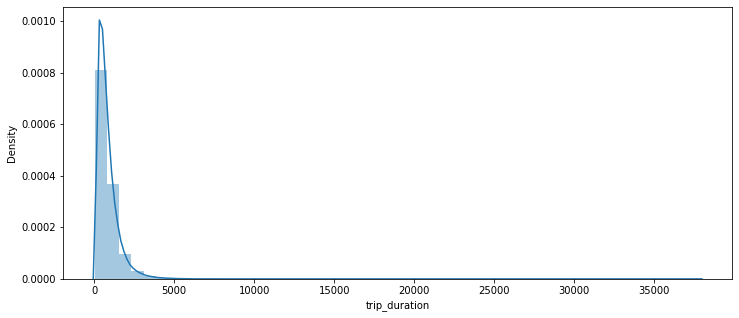

In [132]:
# Distribution plot of trip distance
plt.figure(figsize = (12,5))
sns.distplot(taxi_df_model['trip_duration'])

#### We can see that the variable is highly positively skewed. I might log-transform the trip_duration only for linear regression model. Other models are fine with it.


In [133]:
# Check how much data we've lost
100-taxi_df_model.shape[0]/1458644*100

1.0276667918971327

We have accomplished our data cleaning process by losing approx 1% of data only! Cool! Now let's move towards modeling part.

<AxesSubplot:>

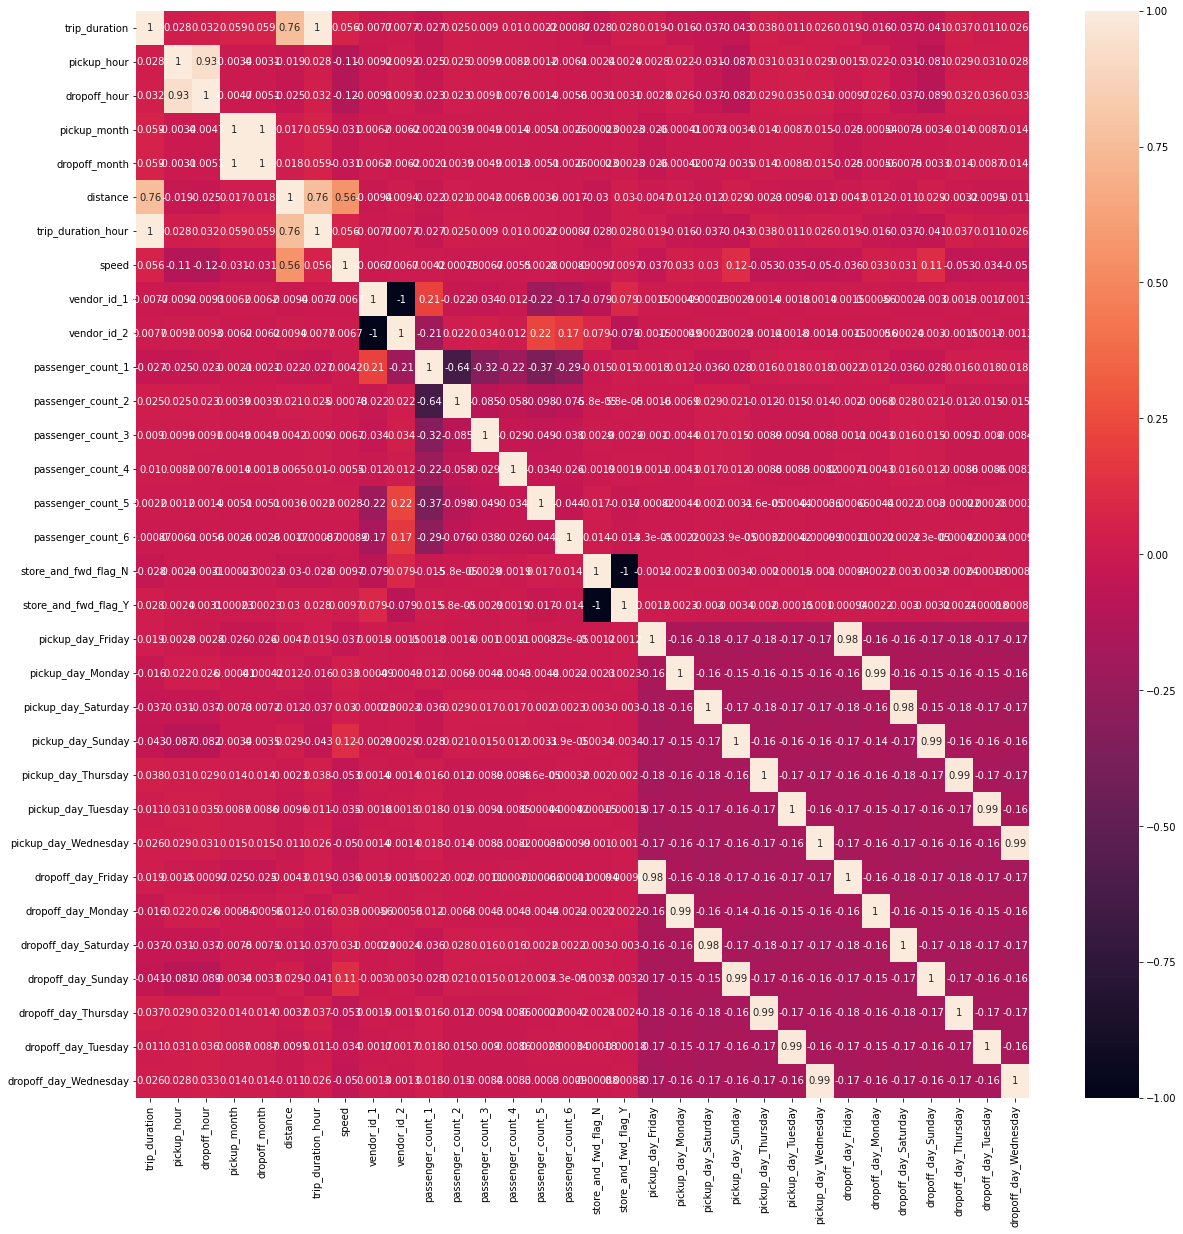

In [134]:
# Plotting correlation heatmap
corrmat_2 = taxi_df_model.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corrmat_2, annot = True)

We can see that vendor_id and store_and_fwd_flag items have correlation of -1 between their classes. Even we saw that store_and_fwd_flag had N as dominant class. So we can remove store_and_fwd_flag from training set. There are also some highly correlated features which are eventually dummies derived from the original dataset. But let's not remove them as they are important features according to me.

# **3. Model Training and Testing:**

Firstly, let's discuss how we are going to proceed. I am discussing my analytical path below in steps:



1.   Scaling the variables.
2.   Splitting the dataset into train-test sets.
3. (Only for Linear Regression) Log-transform trip_duration.
4.   Fit the model.
5.   Evaluate the model.

To do some of these tasks at one go, I am defining a function which will take models and datasets as input and fit the model and show us evaluation metrics. The function will work except for Linear Regression as there are some extra transformations that need to be performed.

In [140]:
# Define X and y
X = taxi_df_model.drop(['trip_duration', 'trip_duration_hour', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y'], axis = 1)
y = taxi_df_model['trip_duration']

In [141]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [142]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### **1. Linear Regression :**

In [143]:
# Log transforming the y variable
y1 = np.log10(y)

d:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

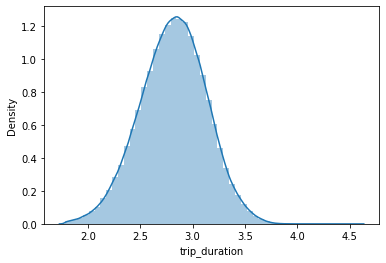

In [144]:
sns.distplot(y1)

In [146]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2, random_state = 123)

In [153]:
# Exporting and initiating the Linear Regression model
from sklearn.linear_model import LinearRegression
lin_model_1 = LinearRegression()
lin_model_1.fit(X_train,y_train1)

LinearRegression()

In [154]:
# Now let's check the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = lin_model_1.predict(X_train)
y_pred_test = lin_model_1.predict(X_test)
print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train, y_pred_train)}')
print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train, y_pred_train)**0.5}')
print(f'The R2 score for training set is : {r2_score(y_train, y_pred_train)}')
print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test, y_pred_test)}')
print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'The R2 score for testing set is : {r2_score(y_test, y_pred_test)}')

The Mean Squared Error (MSE) for training set is : 1151943.9070809456
The Root Mean Squared Error (RMSE) for training set is : 1073.286498135957
The R2 score for training set is : -1.572024649543064
The Mean Squared Error (MSE) for testing set is : 1150820.2425657343
The Root Mean Squared Error (RMSE) for testing set is : 1072.7629013746393
The R2 score for testing set is : -1.556378069519082


In [162]:
# Exporting and initiating the Linear Regression model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [163]:
# Now let's check the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)
print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train, y_pred_train)}')
print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train, y_pred_train)**0.5}')
print(f'The R2 score for training set is : {r2_score(y_train, y_pred_train)}')
print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test, y_pred_test)}')
print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'The R2 score for testing set is : {r2_score(y_test, y_pred_test)}')

The Mean Squared Error (MSE) for training set is : 99122.54173579275
The Root Mean Squared Error (RMSE) for training set is : 314.83732583001137
The R2 score for training set is : 0.778682261260569
The Mean Squared Error (MSE) for testing set is : 103131.42218205034
The Root Mean Squared Error (RMSE) for testing set is : 321.14081363484513
The R2 score for testing set is : 0.7709086995578737


Now, this is an interesting picture! Log-transformation ruined the model. Without the transformation, the model gave an r2 score of 0.77 across both sets. And also it predicts trip duration with around 5.35 minutes of error!

But the hunger for accuracy shouldn't stop. Let's regularize the model and see how performance changes.

#### Meanwhile, let's define the function I talked about.

In [165]:
def model_trainer_tester(model, X_train_func, X_test_func, y_train_func, y_test_func, params = None):
  '''
  This function takes model, training and testing sets and parameter combinations as input
  and gives model performance and best parameters as output
  '''

  # Importing evaluation metrics
  from sklearn.metrics import mean_squared_error, r2_score

  # Conditioning if a parameter set is provided or not
  if params == None:

    # Fitting the model
    model.fit(X_train_func, y_train_func)

    # Prediction on training set
    y_pred_train = model.predict(X_train_func)

    # Prediction on testing set
    y_pred_test = model.predict(X_test_func)

    # Getting and printing evaluation metrics
    print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)}')
    print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)**0.5}')
    print(f'The R2 score for training set is : {r2_score(y_train_func, y_pred_train)}')
    print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)}')
    print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)**0.5}')
    print(f'The R2 score for testing set is : {r2_score(y_test_func, y_pred_test)}')
  else:

    # Importing GridSearchCV
    from sklearn.model_selection import GridSearchCV

    # Grid Search on provided parameter sets
    reg_model = GridSearchCV(estimator = model, param_grid = params, scoring = 'r2', cv = 3, verbose = 2)
    reg_model.fit(X_train_func, y_train_func)

    # Getting the optimal model and parameters
    optimal_model = reg_model.best_estimator_
    optimal_model.fit(X_train_func, y_train_func)
    optimal_params = reg_model.best_params_

    # Prediction on training set
    y_pred_train = optimal_model.predict(X_train_func)

    # Prediction on testing set
    y_pred_test = optimal_model.predict(X_test_func)

    # Getting and printing evaluation metrics and best hyperparameters
    print(f'Best hyperparameter combination is : {optimal_params}')
    print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)}')
    print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train_func, y_pred_train)**0.5}')
    print(f'The R2 score for training set is : {r2_score(y_train_func, y_pred_train)}')
    print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)}')
    print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test_func, y_pred_test)**0.5}')
    print(f'The R2 score for testing set is : {r2_score(y_test_func, y_pred_test)}')

### **1.1. Ridge Regularized Linear Regression :**

In [167]:
# Exporting and initiating the Ridge Regularized Linear Regression model
from sklearn.linear_model import Ridge
parameters = [{'alpha' : [0.0001, 0.01, 0.1, 1, 5, 10, 100]}]
model_trainer_tester(model = Ridge(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .......................................alpha=0.0001; total time=   0.3s
[CV] END .......................................alpha=0.0001; total time=   0.4s
[CV] END .......................................alpha=0.0001; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ........................................

##### We can see very slight (negligible) improvements here. Let's fit a Lasso Regularization too and see how it performs.

### **1.2. Lasso Regularized Linear Regression :**

In [168]:

# Exporting and initiating the Lasso Regularized Linear Regression model
from sklearn.linear_model import Lasso
parameters = [{'alpha' : [0.0001, 0.01, 0.1, 1, 5, 10, 100]}]
model_trainer_tester(model = Lasso(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.840e+10, tolerance: 3.463e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=  39.9s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.789e+10, tolerance: 3.443e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=  37.5s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.754e+10, tolerance: 3.438e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=  40.0s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.367e+10, tolerance: 3.463e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=  40.0s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+10, tolerance: 3.443e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=  37.3s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+09, tolerance: 3.438e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time=  35.1s
[CV] END ..........................................alpha=0.1; total time=  14.3s
[CV] END ..........................................alpha=0.1; total time=  14.6s
[CV] END ..........................................alpha=0.1; total time=  19.5s
[CV] END ............................................alpha=1; total time=   1.0s
[CV] END ............................................alpha=1; total time=   0.7s
[CV] END ............................................alpha=1; total time=   0.6s
[CV] END ............................................alpha=5; total time=   0.6s
[CV] END ............................................alpha=5; total time=   0.6s
[CV] END ............................................alpha=5; total time=   0.5s
[CV] END ...........................................alpha=10; total time=   0.5s
[CV] END ...........................................alpha=10; total time=   0.5s
[CV] END ...................

d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.696e+10, tolerance: 5.173e+07
  model = cd_fast.enet_coordinate_descent(


Best hyperparameter combination is : {'alpha': 0.0001}
The Mean Squared Error (MSE) for training set is : 99137.1066255609
The Root Mean Squared Error (RMSE) for training set is : 314.8604557983757
The R2 score for training set is : 0.7786497412261547
The Mean Squared Error (MSE) for testing set is : 103146.72423104469
The Root Mean Squared Error (RMSE) for testing set is : 321.1646372673129
The R2 score for testing set is : 0.7708747083044868


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.696e+10, tolerance: 5.173e+07
  model = cd_fast.enet_coordinate_descent(


##### It seems like Lasso Regularization couldn't converge and stopped due to reaching maximum number of iterations. More or less, we can see that the scores are almost similar to the previous models. Let's try out ElasticNet too.

### **1.3. ElasticNet Regularized Linear Regression :**

In [169]:

# Exporting and initiating the ElasticNet Regularized Linear Regression model
from sklearn.linear_model import ElasticNet
parameters = [{'alpha' : [0.01, 0.1, 1, 10, 100],
               'l1_ratio' : [0.3, 0.6, 0.9]}]
model_trainer_tester(model = ElasticNet(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=  20.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=  20.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.3; total time=  20.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=  26.5s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=  30.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.6; total time=  31.8s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.507e+09, tolerance: 3.463e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=  38.2s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.397e+09, tolerance: 3.443e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=  37.5s


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.321e+09, tolerance: 3.438e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.01, l1_ratio=0.9; total time=  39.2s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   2.9s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   3.1s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   2.4s
[CV] END ............................alpha=0.1, l1_ratio=0.6; total time=   2.2s
[CV] END ............................alpha=0.1, l1_ratio=0.6; total time=   2.8s
[CV] END ............................alpha=0.1, l1_ratio=0.6; total time=   2.8s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   3.9s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   5.8s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   4.2s
[CV] END ..............................alpha=1, l1_ratio=0.3; total time=   0.8s
[CV] END ..............................alpha=1, l1_ratio=0.3; total time=   0.9s
[CV] END ...................

d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.783e+09, tolerance: 5.173e+07
  model = cd_fast.enet_coordinate_descent(


Best hyperparameter combination is : {'alpha': 0.01, 'l1_ratio': 0.9}
The Mean Squared Error (MSE) for training set is : 99143.49950047804
The Root Mean Squared Error (RMSE) for training set is : 314.87060755249615
The R2 score for training set is : 0.7786354674131963
The Mean Squared Error (MSE) for testing set is : 103159.71057672308
The Root Mean Squared Error (RMSE) for testing set is : 321.1848542143964
The R2 score for testing set is : 0.7708458610457511


d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.783e+09, tolerance: 5.173e+07
  model = cd_fast.enet_coordinate_descent(


##### It seems we faced the similar problem here. And scores are also pretty similar too.
#### With that, let's move forward to tree based models!

### **2. Random Forest :**

In [170]:

# Exporting and initiating the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
parameters = [{'n_estimators' : [30,60],
               'max_depth' : [4,8],
               'min_samples_split' : [1000,5000]}]
model_trainer_tester(model = RandomForestRegressor(n_jobs = -1), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=4, min_samples_split=1000, n_estimators=30; total time=  22.9s
[CV] END max_depth=4, min_samples_split=1000, n_estimators=30; total time=  19.7s
[CV] END max_depth=4, min_samples_split=1000, n_estimators=30; total time=  21.9s
[CV] END max_depth=4, min_samples_split=1000, n_estimators=60; total time=  48.3s
[CV] END max_depth=4, min_samples_split=1000, n_estimators=60; total time=  48.3s
[CV] END max_depth=4, min_samples_split=1000, n_estimators=60; total time=  46.4s
[CV] END max_depth=4, min_samples_split=5000, n_estimators=30; total time=  17.2s
[CV] END max_depth=4, min_samples_split=5000, n_estimators=30; total time=  17.4s
[CV] END max_depth=4, min_samples_split=5000, n_estimators=30; total time=  17.7s
[CV] END max_depth=4, min_samples_split=5000, n_estimators=60; total time=  34.8s
[CV] END max_depth=4, min_samples_split=5000, n_estimators=60; total time=  35.0s
[CV] END max_depth=4, min_samples_spli

WOW!!! We got an r2 score of 0.983 across both sets. I could've classified it as an overfit model if the test score too wasn't the same! The model can predict trip duration with approx 1.45 minutes of error. It took a lot of time to train this model. Looks like we've built a very good (maybe best) model! 
##### **I don't think any model could perform better than this. But still, let's get on with the other models too.**

### **3. Gradient Boosting Machine :**

I am going to fit GBM only for the best parameter sets of Random Forest as GBM is far more time consuming than Random Forest. Let's see what happens.

In [171]:
# Exporting and initiating the GBM Regression model
from sklearn.ensemble import GradientBoostingRegressor
model_trainer_tester(model = GradientBoostingRegressor(max_depth = 8, min_samples_split = 1000, n_estimators = 60), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test)

The Mean Squared Error (MSE) for training set is : 131.02218892445904
The Root Mean Squared Error (RMSE) for training set is : 11.446492428882266
The R2 score for training set is : 0.999707457717794
The Mean Squared Error (MSE) for testing set is : 647.7103495386481
The Root Mean Squared Error (RMSE) for testing set is : 25.450154214437447
The R2 score for testing set is : 0.9985612066318285


#### Okay! GBM was an improvement on Random Forest. It almost gives an r2 score of 0.99 approx and can predict trip durations with approx 25 seconds of error and also it took less time to train than random forest model. That's unbelievable right? Now, let's fit a SVM algorithm.


### **4. SVM :**


In [172]:
# Exporting and initiating the SVM Regression model
from sklearn.svm import SVR
parameters = [{'C' : [10000, 100000, 1000000]}]
model_trainer_tester(model = SVR(max_iter = 1000), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ............................................C=10000; total time= 2.3min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ............................................C=10000; total time= 5.7min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ............................................C=10000; total time= 5.8min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...........................................C=100000; total time= 5.5min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...........................................C=100000; total time= 4.5min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...........................................C=100000; total time= 5.4min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................................C=1000000; total time= 1.8min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................................C=1000000; total time= 1.8min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........................................C=1000000; total time= 4.4min


d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best hyperparameter combination is : {'C': 10000}
The Mean Squared Error (MSE) for training set is : 226753.3159761734
The Root Mean Squared Error (RMSE) for training set is : 476.18621985119796
The R2 score for training set is : 0.49371222463928255
The Mean Squared Error (MSE) for testing set is : 229403.82902749692
The Root Mean Squared Error (RMSE) for testing set is : 478.96119783078143
The R2 score for testing set is : 0.49041310197834764


#### SVM gave us the poorest performance with r2 score of 0.49 . But due to lack of resources I had to make it converge faster. This might be a cause for this poor performance. But on the other hand, it took very much time to get executed approx about 1 Hour.

**A Special Note :**
##### As KNN algorithms are computationally more expensive than all these algorithms, I have chosen not to test it specifically on this huge dataset.

# **4. Model Evaluation :**

##### In this section, I am going to compare all the models according to their r2 score on testing set and time taken to get executed.

##### *Scoring pattern :*

##### Speed Scores (time taken to train the model): 1, 2, 3, 4, 5, 6, 7 (Lower is better)
##### Performance Scores (based on r2 score): 1, 2, 3, 4, 5, 6, 7 (Lower is better)
##### Final score : Performance Score (append) Speed score.

In [175]:
print ('Model Evaluation Table')
from prettytable import PrettyTable
mytable = PrettyTable(['Model Name', 'Performance Score', 'Speed Score', 'Final Score'])
mytable.add_row(['Multiple Linear Regression Model', '4', '1', '41'])
mytable.add_row(['L1 Regularized(Lasso) Linear Regression Model', '3', '2', '32'])
mytable.add_row(['L2 Regularized(Ridge) Linear Regression Model', '3', '1', '31'])
mytable.add_row(['ElasticNet Regularized Linear Regression Model', '3', '2', '32'])
mytable.add_row(['Random Forest Regressor Model', '2', '4', '24'])
mytable.add_row(['Gradient Boosting Machine Regressor Model', '1', '3', '13'])
mytable.add_row(['Support Vector Machine Regressor Model', '5', '5', '55'])

print(mytable)

print('\n')
print('Model Ranks according to their speed and performance :')
print('1. Gradient Boosting Machine')
print('2. Random Forest')
print('3. Ridge Regularized Linear Model')
print('4. Lasso Regularized Linear Model')
print('4. ElasticNet Regularized Linear Model')
print('5. Multiple Linear Model')
print('6. SVM')

Model Evaluation Table
+------------------------------------------------+-------------------+-------------+-------------+
|                   Model Name                   | Performance Score | Speed Score | Final Score |
+------------------------------------------------+-------------------+-------------+-------------+
|        Multiple Linear Regression Model        |         4         |      1      |      41     |
| L1 Regularized(Lasso) Linear Regression Model  |         3         |      2      |      32     |
| L2 Regularized(Ridge) Linear Regression Model  |         3         |      1      |      31     |
| ElasticNet Regularized Linear Regression Model |         3         |      2      |      32     |
|         Random Forest Regressor Model          |         2         |      4      |      24     |
|   Gradient Boosting Machine Regressor Model    |         1         |      3      |      13     |
|     Support Vector Machine Regressor Model     |         5         |      5      |  

#### For the final part of this section, I am going to check variable importance in Linear Model and Random Forest Model to get an idea of important variables.

In [176]:
# Re-training the optimal Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs = -1, max_depth=8, min_samples_split=6, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=6, n_jobs=-1)

Text(0, 0.5, 'Coefficient of feature')

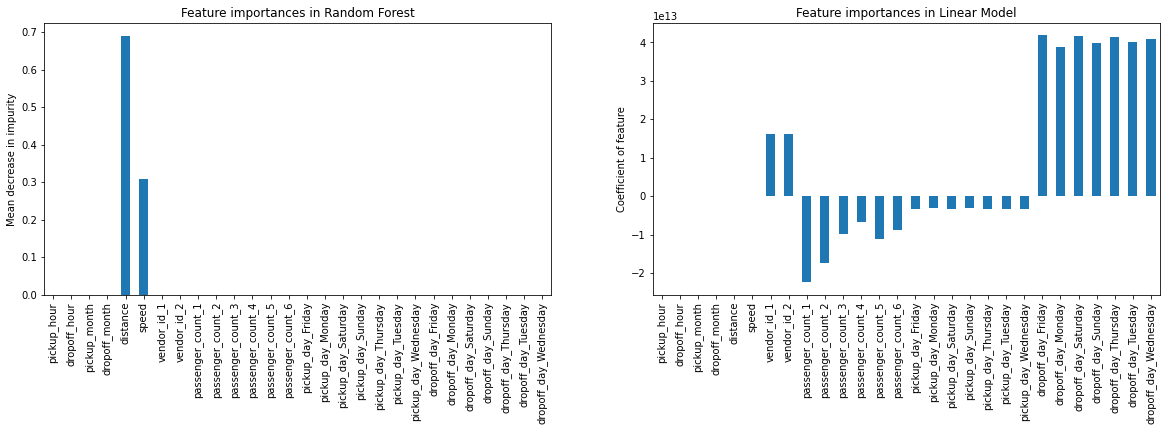

In [177]:
# Getting Feature Importances
feature_importance = rf_model.feature_importances_
features = taxi_df_model.drop(['trip_duration', 'trip_duration_hour', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y'], axis = 1).columns
forest_importances = pd.Series(feature_importance, index=features)

# Getting coefficients
coeffs = lin_model.coef_
coeffs_lin_model = pd.Series(coeffs, index=features)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
# Plotting feature importance for Random Forest
forest_importances.plot.bar()
plt.title("Feature importances in Random Forest")
plt.ylabel("Mean decrease in impurity")

plt.subplot(1,2,2)
# Plotting feature importance for Linear Model
coeffs_lin_model.plot.bar()
plt.title("Feature importances in Linear Model")
plt.ylabel("Coefficient of feature")

##### Now, this is an interesting picture. In Random Forest, distance and speed are the main features that are being used in estimating trip duration. But in the case of Linear Regression, almost all the other variables have an impact on estimating trip duration except for distance and speed. This might be the reason that Linear Models were so poor performance.

#### I just have a small wish to see whether the Linear Model performs better if we only take speed and distance as features.

In [181]:
X1 = taxi_df_model[['speed', 'distance']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.2, random_state = 123)

lin_model1 = LinearRegression()
lin_model1.fit(X_train1,y_train1)
y_pred_train1 = lin_model1.predict(X_train1)
y_pred_test1 = lin_model1.predict(X_test1)
print(f'The Mean Squared Error (MSE) for training set is : {mean_squared_error(y_train1, y_pred_train1)}')
print(f'The Root Mean Squared Error (RMSE) for training set is : {mean_squared_error(y_train1, y_pred_train1)**0.5}')
print(f'The R2 score for training set is : {r2_score(y_train1, y_pred_train1)}')
print(f'The Mean Squared Error (MSE) for testing set is : {mean_squared_error(y_test1, y_pred_test1)}')
print(f'The Root Mean Squared Error (RMSE) for testing set is : {mean_squared_error(y_test1, y_pred_test1)**0.5}')
print(f'The R2 score for testing set is : {r2_score(y_test1, y_pred_test1)}')

The Mean Squared Error (MSE) for training set is : 99726.31003672091
The Root Mean Squared Error (RMSE) for training set is : 315.7947276898728
The R2 score for training set is : 0.7773341861129387
The Mean Squared Error (MSE) for testing set is : 103721.35312538793
The Root Mean Squared Error (RMSE) for testing set is : 322.0579965245203
The R2 score for testing set is : 0.7695982546505816


##### Nope! No luck. It gave a lower r2 score on test data with speed and distance variable only .  It seems Linear Regression might never get to that r2 score of Random Forest. But we can see that these two variables alone can get to the accuracy that the other variables gave altogether. And with that, let's conclude our work here!

# **Final Verdicts :**

#### **1. Important Variables :** 
When Random Forest used only speed and distance, it gave very high accuracy. But when Linear Regression used other variables except for speed and distance, the model couldn't get to a high accuracy.

#### **2. Best Model :** 
Gradient Boosting Machine is the best choice here. If anyone has the resources to consume that much time, the model will predict trip durations with 99% accuracy.

#### **3. Challenges faced :**
I am listing some challenges faced by me :
*   Huge data size.
*   Getting new features which can predict trip duration more accurately.
*   Too much training time for black box models.

#### **4. Use cases :**
With so much high accuracy across both train and test set, this model can be used for any intra-city journeys. But beware! As this model doesn't take account for long distance journeys, it might not be too accurate to predict inter-city trip durations. There might be cases when a cab might take a highway. Then that highway might be a variable that should be accounted for in predicting the trip duration. The high trip durations can be predicted by some other models and more data. 

